In [1]:
%load_ext autoreload
%autoreload 2
import pickle
import numpy as np
import matplotlib.pyplot as plt

import random
import matplotlib.cm as cm

with open('pickles\List_of_radial_object_all_minutes_v3.pkl', 'rb') as f:
    loaded_radial_dist_list = pickle.load(f)




<>:10: SyntaxWarning: invalid escape sequence '\L'
<>:10: SyntaxWarning: invalid escape sequence '\L'
C:\Users\rlanzafame\AppData\Local\Temp\ipykernel_14612\2004673486.py:10: SyntaxWarning: invalid escape sequence '\L'
  with open('pickles\List_of_radial_object_all_minutes_v3.pkl', 'rb') as f:


In [2]:
loaded_radial_dist_list[0]
loaded_radial_dist_list[32484][20]

0.013402586315878536

86400
The maximum length of the lists is 100
86400.0 lists have a sum of 1.0


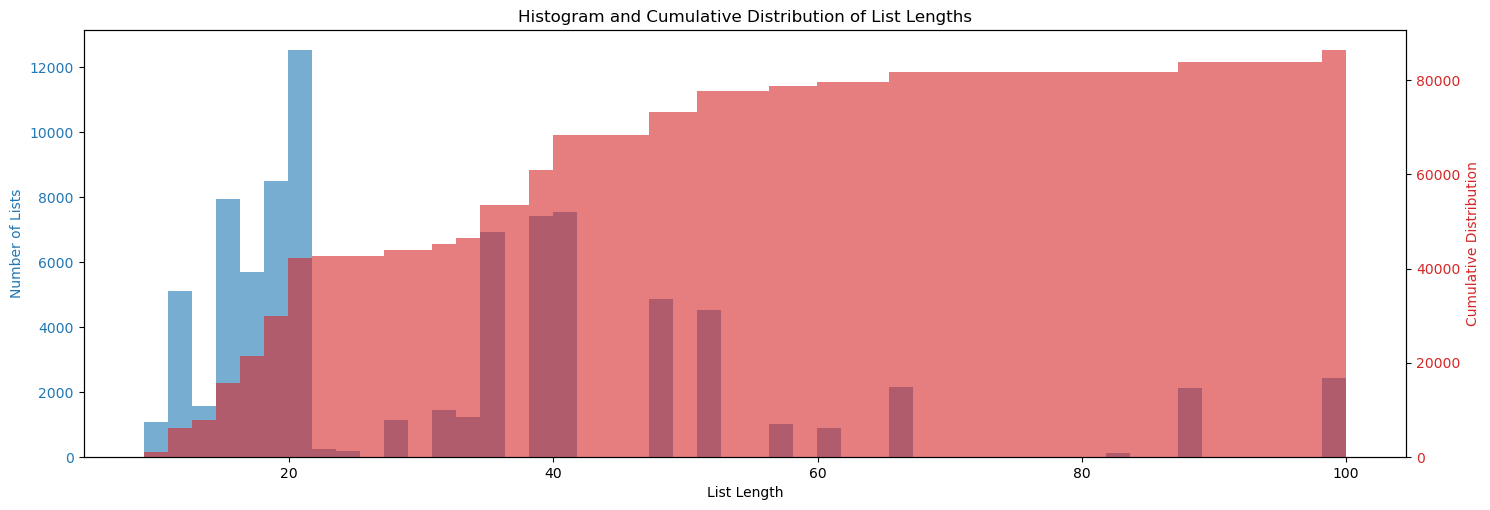

In [13]:
print(len(loaded_radial_dist_list))

# for list in loaded_radial_dist_list:
#     print(len(list))

loaded_list_lengths = [len(list) for list in loaded_radial_dist_list]
loaded_list_sum = [array.sum() for array in loaded_radial_dist_list]
loaded_list_sum = np.array(loaded_list_sum)
print(f"The maximum length of the lists is {max(loaded_list_lengths)}")
print(f"{sum(loaded_list_sum[np.isclose(loaded_list_sum,1.0,rtol=0.001)])} lists have a sum of 1.0")
fig, ax1 = plt.subplots(figsize=(15, 5))

color = 'tab:blue'
ax1.set_xlabel('List Length')
ax1.set_ylabel('Number of Lists', color=color)
ax1.hist(loaded_list_lengths, bins=50, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Cumulative Distribution', color=color)
ax2.hist(loaded_list_lengths, bins=50, cumulative=True, color=color, alpha=0.6)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Histogram and Cumulative Distribution of List Lengths')
plt.show()


In [4]:
len(loaded_radial_dist_list)

86400

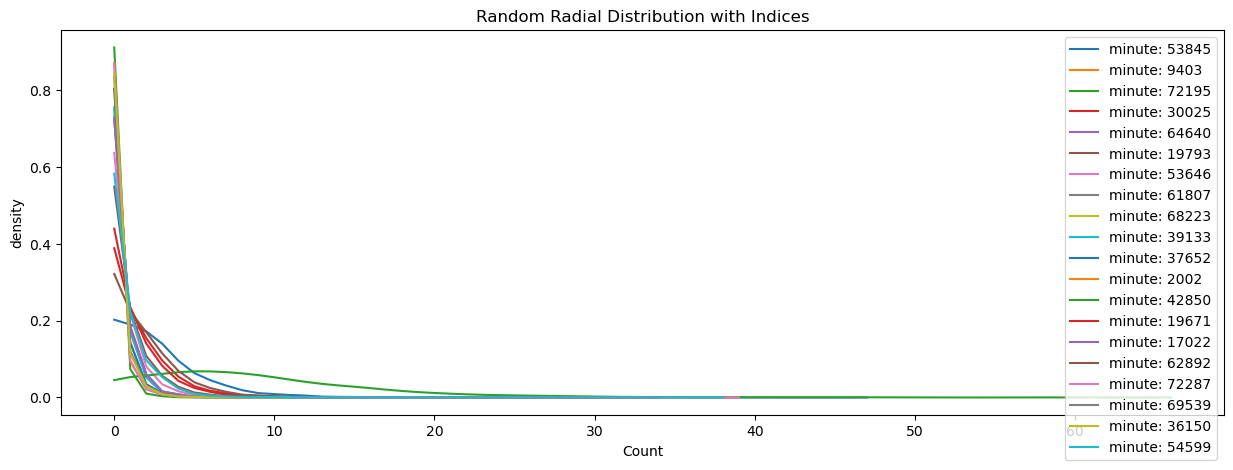

In [5]:
n_plots = 20
random_indices = random.sample(range(len(loaded_radial_dist_list)), n_plots)
biggest_indices = sorted(range(len(loaded_radial_dist_list)), key=lambda i: len(loaded_radial_dist_list[i]), reverse=True)[:n_plots]

plot_indices = [random_indices, biggest_indices]

plt.figure(figsize=(15, 5))
for idx in plot_indices[0]:
    rd = loaded_radial_dist_list[idx]
    plt.plot(rd, label=f'minute: {idx}')  
 



plt.legend()
plt.title('Random Radial Distribution with Indices')
plt.xlabel('Count')
plt.ylabel('density')
plt.show()

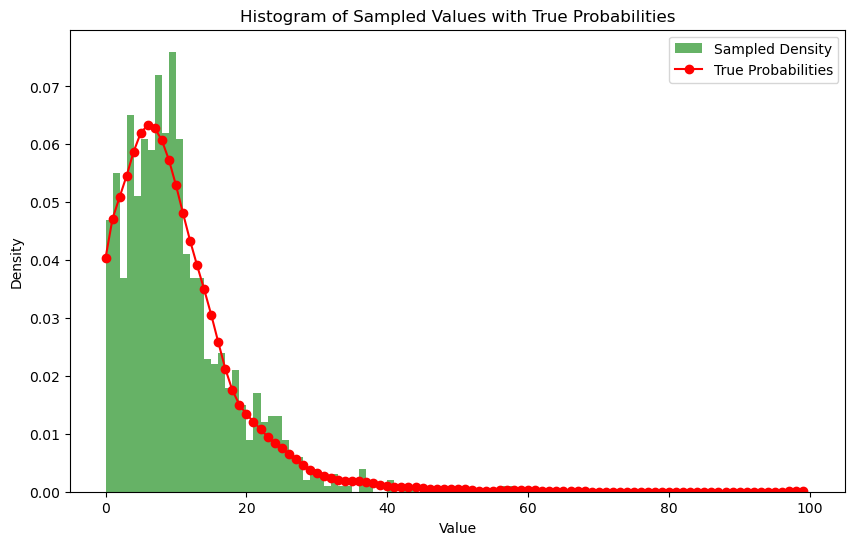

In [6]:
from models import sample_integer

def plot_sample_distribution(sample, probabilities):
    plt.figure(figsize=(10, 6))
    plt.hist(sample, bins=np.arange(len(probabilities) + 1), density=True, alpha=0.6, color='g', label='Sampled Density')

    # Verification plot
    plt.plot(np.arange(len(probabilities)), probabilities, 'ro-', label='True Probabilities')

    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Histogram of Sampled Values with True Probabilities')
    plt.legend()
    plt.show()

# Example usage
probabilities = loaded_radial_dist_list[32484]
sample_size = 1000
sample = sample_integer(probabilities, sample_size)

plot_sample_distribution(sample, probabilities)


All values in the sample are 0.


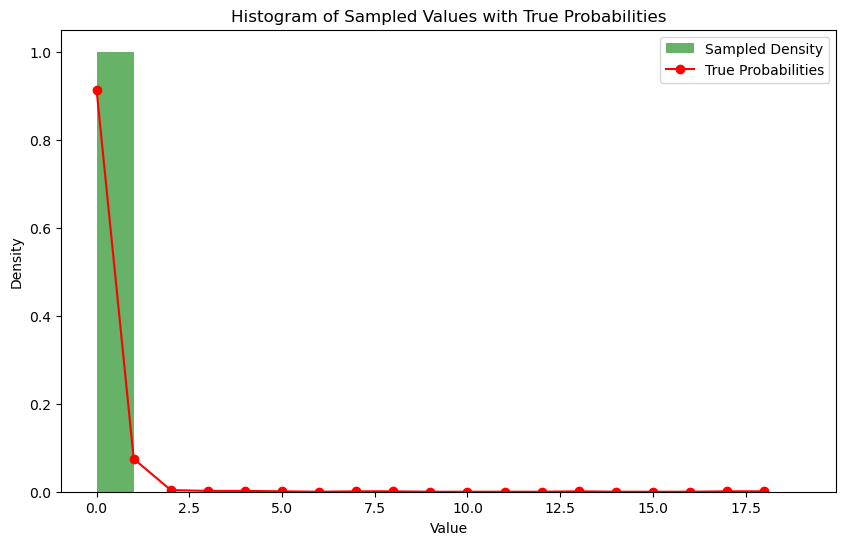

[9.12274672e-01 7.46719357e-02 3.74032591e-03 1.86298249e-03
 1.86236702e-03 9.31286088e-04 4.10312289e-07 9.31080932e-04
 9.31080932e-04 2.05156144e-07 2.19615469e-18 2.19615469e-18
 2.05156144e-07 9.30875775e-04 2.05156144e-07 4.39230939e-18
 2.05156144e-07 9.31080932e-04 9.31080932e-04]


In [9]:
from models import sample_ticket

ticket_sample_criteria = [0.05, 10]
probabilities = loaded_radial_dist_list[0]#[32484]
sample = sample_ticket(probabilities, *ticket_sample_criteria, verbose=True)
plot_sample_distribution(sample, probabilities)
print(probabilities)


In [ ]:
def shift_distribution(values, mode_original, conversion_factor):
    'shitfs the distribution to the right, making higher values more likely, pads with zeros the new vales on the left'
    mode_new = mode_original * conversion_factor

    shift_amount = int(mode_new - mode_original)
    new_distribution = [0] * shift_amount + values
    
    return new_distribution

In [ ]:
def scale_minute(minute,
                         mu=reference_min["mu"],
                         std=reference_min["std"],
                         eta=reference_min["eta"]):
            """see colab notebook"""
            
            minute_in_hour = minute % 60  
            
            # bump corrections (0,15,30,and others)
            if minute_in_hour == 0:
                scaling_factor = eta[0]
            elif minute_in_hour==15:
                scaling_factor = eta[1]
            elif minute_in_hour==30:
                scaling_factor = eta[2]
            elif 1<minute<250: # correction for minutes just after midnight
                scaling_factor = eta[3]*1/(minute)
            elif minute==24*60:
                scaling_factor = eta[4]
            elif minute>24*60-5:# correction for minutes just before midnight
                scaling_factor = eta[5]
            else:
                # linearly decreasing correction factor for minutes 1 to 59
                scaling_factor = 1 - eta[6] * (minute_in_hour % 10) / 10 
                
                # linear correction factor that decreases from 1 to 0 over the hour
                minute_scaling_factor = 1 - eta[7]*minute_in_hour / 60.0
                scaling_factor *= minute_scaling_factor 
     
            return scaling_factor